![](https://d6vdma9166ldh.cloudfront.net/media/images/4594dcf8-a8c5-4fa7-a6d4-bab2c9081041.jpg)

# Zadanie na dziś:
### Przeanalizuj dane historyczne dotyczące sprzedaży produktu 



---



#### Dane w pliku `train.xlsx` zawierają następujące dane:

|Zmienna|Objasnienie|
|-------|-----------|
|Id|Unique Id|
|Bought_Product|Whether customer bought new product or not|
|Market_Segment	|One of 3 market segments|
|Online_Account	|Whether customer have online account|
|EnergyTariff| One of 3 Energy Tariffs|
|Sex| F-female, M-male|
|Age| Age in years|
|Non_Energy_Product| How many non-energy products customer have e.g. insurance|
|How_many_other_contracts| How many other energy contracts customer have (e.g. for 2nd property)|
|Billing_Amount| Average Monthly Invoice in PLN|
|District| One of A-E Districts|



# Rodzaje algorytmów ML



![alt text](https://lh3.googleusercontent.com/proxy/7fyR2uUI6uma1_Q9dIu1iJRHoi3whtcSeBmy1NPPQHx2iBlEm4zTBxQiTn2Sja9K04nFW0TBG4nc_lzOb9sz42D47aLArEYoqSm_Bi2pUFrhrDdWfG87KiC5fV0HLPoUINoZSBON66w8__reTcaj)

# Kodowanie

In [0]:
# import packeges
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# from google.colab import drive
# drive.mount('/content/drive')

In [113]:
# >>>>>>>TU ZMIENIĆ ŚCIEŻKĘ DO PLIKU <<<<<<<#
dataset_path = "/content/drive/My Drive/DSMaciek/train.xlsx"
raw_df = pd.read_excel(dataset_path)
raw_df.sample(5)

,Id,Bought_Product,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
215,477,0,3,NaN,NaN,M,16,2,0,21.6792,DistrictC
271,533,1,2,1.0,C12,F,28,0,0,13.0000,DistrictE
305,567,1,2,0.0,G12,F,17,0,0,10.5000,DistrictC
511,773,1,2,0.0,C12,F,28,1,0,26.0000,DistrictA
424,686,0,2,1.0,C12,M,23,0,0,13.0000,DistrictD


In [114]:
raw_df.set_index('Id', inplace=True)
raw_df.sample()

,Bought_Product,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
Id,,,,,,,,,,
391,0,3,0.0,G12,F,20,0,0,8.6625,DistrictA


In [115]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 262 to 887
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bought_Product            626 non-null    int64  
 1   Market_Segment            626 non-null    int64  
 2   Online_Account            367 non-null    float64
 3   EnergyTariff              611 non-null    object 
 4   Sex                       626 non-null    object 
 5   Age                       626 non-null    int64  
 6   Non_Energy_Product        626 non-null    int64  
 7   How_many_other_contracts  626 non-null    int64  
 8   Billing_Amount            618 non-null    float64
 9   District                  607 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 53.8+ KB


### Sprawdzenie poprawności danych

>>>>>Bought_Product<<<<<
0    386
1    240
Name: Bought_Product, dtype: int64
>>>>>Market_Segment<<<<<
3    340
1    144
2    142
Name: Market_Segment, dtype: int64
>>>>>Online_Account<<<<<
0.0    186
1.0    181
Name: Online_Account, dtype: int64
>>>>>EnergyTariff<<<<<
C12    345
G12    245
G11     21
Name: EnergyTariff, dtype: int64
>>>>>Sex<<<<<
M    406
F    220
Name: Sex, dtype: int64
>>>>>Age<<<<<


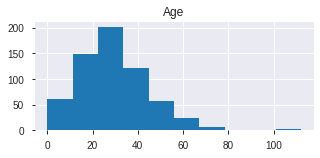

>>>>>Non_Energy_Product<<<<<
0    429
1    144
2     23
3     14
4     10
8      3
5      3
Name: Non_Energy_Product, dtype: int64
>>>>>How_many_other_contracts<<<<<
0    480
1     85
2     51
5      5
3      4
4      1
Name: How_many_other_contracts, dtype: int64
>>>>>Billing_Amount<<<<<


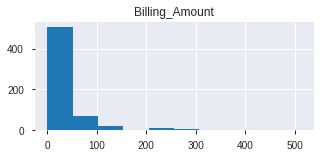

>>>>>District<<<<<
DistrictD    137
DistrictC    133
DistrictA    127
DistrictB    123
DistrictE     87
Name: District, dtype: int64


In [116]:
for col_ in raw_df.columns:
  print(f">>>>>{col_}<<<<<")
  unique_values = raw_df[col_].value_counts()
  if unique_values.shape[0] < 10:
    print(unique_values)
  else:
    raw_df[col_].hist(figsize=(5,2))
    plt.title(col_)
    plt.show()
    




In [0]:
df = raw_df.drop("Online_Account", axis=1)
# df = raw_df.drop(columns=['Online_Account'])
df.loc[(df['Age'] < 18) | (df['Age'] > 100), 'Age'] = np.nan
df.dropna(inplace=True)

In [135]:
raw_df.shape, df.shape

((626, 10), (494, 9))

In [136]:
df.head(10)

,Bought_Product,Market_Segment,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
Id,,,,,,,,,
262,0,3,G12,M,22.0,0,0,9.0000,DistrictA
263,0,2,C12,M,29.0,1,0,27.7208,DistrictA
264,0,3,G12,M,18.0,0,0,7.7958,DistrictD
265,0,3,G12,M,41.0,0,0,7.7500,DistrictD
266,0,3,G12,M,22.0,0,0,8.0500,DistrictA
268,0,3,C12,M,28.0,0,0,56.4958,DistrictD
269,0,2,G12,M,36.0,0,0,10.5000,DistrictA
270,0,2,C12,M,27.0,0,0,26.0000,DistrictA
271,1,2,C12,F,24.0,1,0,26.0000,DistrictE


In [0]:
cat_columns = ['Market_Segment', 'Sex', 'District', 'EnergyTariff']
for col_ in cat_columns:
  df = df.join(pd.get_dummies(df[col_], drop_first=True, prefix=col_)).drop(col_, axis=1)

In [138]:
df.shape

(494, 14)

In [139]:
df.sample()

,Bought_Product,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,Market_Segment_2,Market_Segment_3,Sex_M,District_DistrictB,District_DistrictC,District_DistrictD,District_DistrictE,EnergyTariff_G11,EnergyTariff_G12
Id,,,,,,,,,,,,,,
325,0,28.0,0,1,33.0,1,0,1,0,0,0,0,0,0


In [0]:
y = df["Bought_Product"]
X = df.drop('Bought_Product', axis=1)

In [143]:
y.shape, X.shape

((494,), (494, 13))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix

In [158]:
model = DecisionTreeClassifier(max_depth=2, random_state=0)

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"{accuracy_score(y_train, y_train_pred)}")
print(f"{accuracy_score(y_test, y_test_pred)}")

0.810126582278481
0.8181818181818182


In [166]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
(tn, fp, fn, tp)

(217, 34, 42, 102)

In [151]:
for k, importance in zip(X.columns, model.feature_importances_):
  print(k, importance)

Age 0.1963699378237943
Non_Energy_Product 0.022751213755323896
How_many_other_contracts 0.005494276216043286
Billing_Amount 0.1989820220808584
Market_Segment_2 0.005127991134973734
Market_Segment_3 0.06927899014478127
Sex_M 0.34254624017336477
District_DistrictB 0.03334742980070777
District_DistrictC 0.03950646231535886
District_DistrictD 0.0683727537715834
District_DistrictE 0.01822268278321023
EnergyTariff_G11 0.0
EnergyTariff_G12 0.0


In [0]:
from sklearn.svm import LinearSVC

In [163]:
model2 = LinearSVC(random_state=0, max_iter=10000)
model2.fit(X_train, y_train)
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)
print(f"{accuracy_score(y_train, y_train_pred)}")
print(f"{accuracy_score(y_test, y_test_pred)}")

0.8075949367088607
0.8181818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
